In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import keras
import tensorflow as tf
from keras.utils.np_utils import to_categorical
import random
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


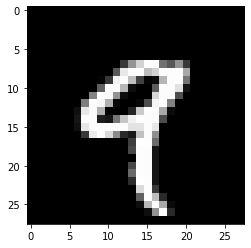

In [5]:
plt.imshow(X_train[y_train == 9][0], cmap='gray')

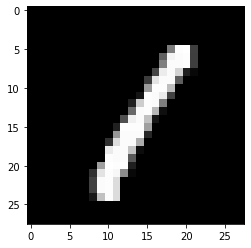

In [6]:
plt.imshow(X_train[y_train == 1][0], cmap='gray')

In [7]:
samples = []
for i in range(10):
    samples.append((X_train[y_train==i]).shape[0])

In [8]:
samples

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

In [9]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)


In [10]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [11]:
#let's normalize
X_train = X_train / 255 #255/255=1  127/255=0.5 ...
X_test = X_test / 255

In [12]:
# flatten
n_pixels = 784
X_train = X_train.reshape(X_train.shape[0],n_pixels)
X_test = X_test.reshape(X_test.shape[0],n_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [13]:
def cread_model():
    model = Sequential()
    model.add(Dense(10, input_dim=n_pixels, activation="relu"))
    model.add(Dense(30, activation="relu"))
    model.add(Dense(10, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
model = cread_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 8,490
Trainable params: 8,490
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs= 20, batch_size=200, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 3s 47us/sample - loss: 0.7771 - accuracy: 0.7435 - val_loss: 0.4780 - val_accuracy: 0.8577
Epoch 2/20
54000/54000 [==============================] - 2s 41us/sample - loss: 0.5118 - accuracy: 0.8464 - val_loss: 0.4099 - val_accuracy: 0.8783
Epoch 3/20
54000/54000 [==============================] - 2s 45us/sample - loss: 0.4549 - accuracy: 0.8657 - val_loss: 0.3765 - val_accuracy: 0.8897
Epoch 4/20
54000/54000 [==============================] - 2s 37us/sample - loss: 0.4316 - accuracy: 0.8709 - val_loss: 0.3713 - val_accuracy: 0.8887
Epoch 5/20
54000/54000 [==============================] - 2s 41us/sample - loss: 0.4212 - accuracy: 0.8740 - val_loss: 0.3497 - val_accuracy: 0.8993
Epoch 6/20
54000/54000 [==============================] - 2s 36us/sample - loss: 0.4088 - accuracy: 0.8770 - val_loss: 0.3500 - val_accuracy: 0.8967
Epoch 7/20
54000/54000 [==============================] -

Text(0.5, 0, 'epoch')

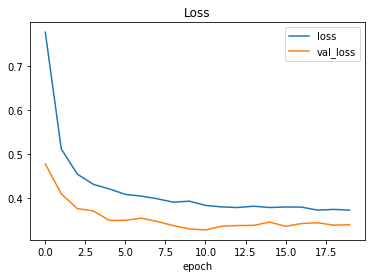

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [18]:
score = model.evaluate(X_test, y_test, verbose = 1)
print(type(score))
print("accuracy: ",score[0])
print("loss: ",score[1])

10000/10000 [==============================] - 1s 81us/sample - loss: 0.3997 - accuracy: 0.8812
<class 'list'>
accuracy:  0.39967321391105654
loss:  0.8812


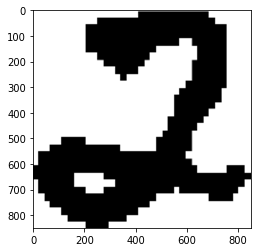

In [19]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)

plt.imshow(img)

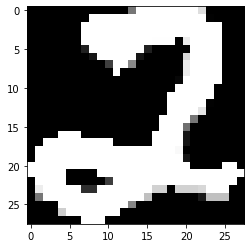

In [20]:
import cv2

img_arr = np.asarray(img)
resize = cv2.resize(img_arr, (28,28))
gray = cv2.cvtColor(resize, cv2.COLOR_RGB2GRAY)
image = cv2.bitwise_not(gray)
plt.imshow(image, cmap='gray')

In [21]:
image = image/255 #normalized
image = image.reshape(1,784) #28*28 flatten

In [22]:
predection = model.predict_classes(image)
print('predected digit: ', str(predection))

predected digit:  [3]


In [23]:
i = plt.imread('1.png')
i = cv2.resize(i, (28,28))
i = cv2.cvtColor(i, cv2.COLOR_RGB2GRAY)
plt.imshow(i, cmap='gray')
i = i.reshape(1,784)
predection = model.predict_classes(i)
print('predected digit: ', str(predection))

FileNotFoundError: [Errno 2] No such file or directory: 'download.png'

predected digit:  [1]
